# Brain - ANN similarity

In [41]:
import pandas as pd
import numpy as np
from lstnn.parcellation import Parcellation
import matplotlib.pyplot as plt
import seaborn as sns

# parameters
pe_desc = "2dpe"
fmethod = "crossnobis" # "crossnobis"
amethod = "euclidean" #  "euclidean"
cmethod = "corr" 
epoch = 4000
n_perms = 10000
atlas = "Glasser"

if atlas == "Glasser":
    cortex = 'Glasser'
    cortex_res = None
    scale = 1
elif atlas == "Schaefer":
    cortex = 'Schaefer'
    cortex_res = 400
    scale = 1

parc = Parcellation(cortex=cortex, cortex_res=cortex_res, scale=scale)

df_list = []
in_file = f"/home/lukeh/projects/LSTNN/results/model_comparison/group_atlas-{atlas}/pe-{pe_desc}"
in_file += f"_fmethod-{fmethod}_amethod-{amethod}_cmethod-{cmethod}"
in_file += f"_epoch-{epoch}_nperms-{n_perms}"

#df_all = pd.read_csv(in_file+".csv")
df = pd.read_csv(in_file+"_stats.csv")
df.head()

,stat,permutation,compare_method,model,parcel,it,pe,fmethod,cmethod,amethod,epoch,p_FDR,percentile,network
0,0.015285,False,corr,pe_layer0,HIP-rh,0,2dpe,crossnobis,corr,euclidean,4000,1.0,0.7336,NaN
1,0.029015,False,corr,pe_layer1,HIP-rh,0,2dpe,crossnobis,corr,euclidean,4000,1.0,0.8654,NaN
2,-0.005313,False,corr,pe_layer2,HIP-rh,0,2dpe,crossnobis,corr,euclidean,4000,1.0,0.4318,NaN
3,0.014045,False,corr,pe_layer3,HIP-rh,0,2dpe,crossnobis,corr,euclidean,4000,1.0,0.7065,NaN
4,0.015040,False,corr,pe_avg,HIP-rh,0,2dpe,crossnobis,corr,euclidean,4000,1.0,0.6997,NaN


## Table for significant results

In [42]:
data = df.loc[((df.model == "pe_avg") | (df.model == "attn_out_avg"))
              & (df.p_FDR < 0.05)]
results = data[["model", "parcel", "network", "stat", "p_FDR"]]

results.replace("pe_avg", "PE", inplace=True)
results.replace("attn_out_avg", "Attention", inplace=True)
results = results.sort_values(by=["model", "network"])
results["stat"] = np.round(results["stat"],3)
results["p_FDR"] = np.round(results["p_FDR"],4)
results.to_csv('../results/RSA_stats_average.csv', index=False)
results.head()

/tmp/ipykernel_50415/992121060.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results.replace("pe_avg", "PE", inplace=True)
/tmp/ipykernel_50415/992121060.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results.replace("attn_out_avg", "Attention", inplace=True)


,model,parcel,network,stat,p_FDR
1239,Attention,R_8Av_ROI,Default,0.108,0.0000
2499,Attention,R_PGs_ROI,Default,0.141,0.0000
5199,Attention,L_PGs_ROI,Default,0.089,0.0499
1389,Attention,R_a47r_ROI,Frontoparietal,0.128,0.0212
1704,Attention,R_s6-8_ROI,Frontoparietal,0.102,0.0212


In [43]:
# now by layer
data = df.loc[((df.model.str.contains("pe_layer")) | (df.model.str.contains("attn_out_layer")))
              & (df.p_FDR < 0.05)]
data[["new_model", "layer"]] = df["model"].str.split('_layer', expand=True)
results = data[["new_model", "layer", "parcel", "network", "stat", "p_FDR"]]

results.replace("pe", "PE", inplace=True)
results.replace("attn_out", "Attention", inplace=True)
results = results.sort_values(by=["new_model", "layer", "network"])
results["stat"] = np.round(results["stat"],3)
results["p_FDR"] = np.round(results["p_FDR"],4)
results["layer"] = results["layer"].astype(int)+1
results.to_csv('../results/RSA_stats_layer.csv', index=False)
results.head()

/tmp/ipykernel_50415/1930318018.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[["new_model", "layer"]] = df["model"].str.split('_layer', expand=True)
/tmp/ipykernel_50415/1930318018.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[["new_model", "layer"]] = df["model"].str.split('_layer', expand=True)
/tmp/ipykernel_50415/1930318018.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.or

,new_model,layer,parcel,network,stat,p_FDR
246,Attention,2,R_V1_ROI,Visual1,0.243,0.0
2946,Attention,2,L_V1_ROI,Visual1,0.279,0.0
291,Attention,2,R_V2_ROI,Visual2,0.272,0.0
306,Attention,2,R_V3_ROI,Visual2,0.203,0.0
2991,Attention,2,L_V2_ROI,Visual2,0.292,0.0


## Plot all values across brain regions, coloured by network
And print significant brain region details

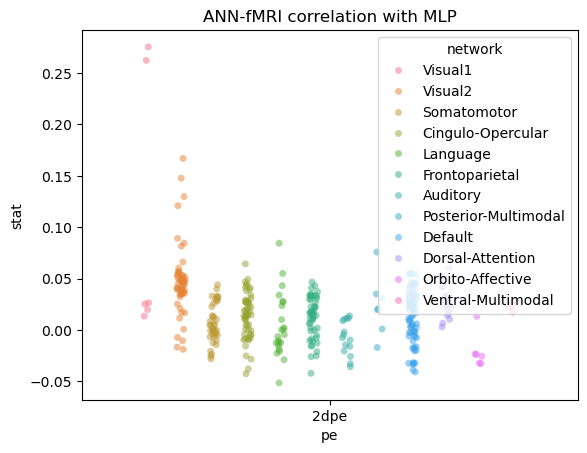

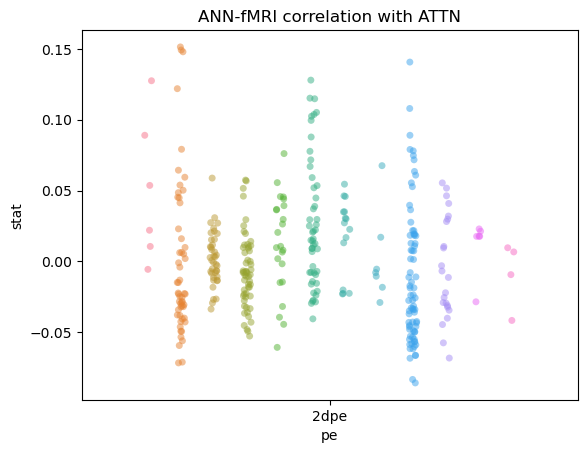

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
data = df.loc[df.model == "pe_avg"]
sns.stripplot(data=data, x="pe", y="stat", hue='network', legend=True, alpha=0.5, dodge=True)
plt.title("ANN-fMRI correlation with MLP")
plt.show()

data = df.loc[df.model == "attn_out_avg"]
sns.stripplot(data=data, x="pe", y="stat", hue='network', legend=False, alpha=0.5, dodge=True)
plt.title("ANN-fMRI correlation with ATTN")
plt.show()

In [45]:
table = df.loc[(df.p_FDR < 0.05) & (df.model.str.startswith("pe"))]
table[['ann', 'model_desc', 'layer']] = table['model'].str.extract(r'(ann)_(.*)_(.*)')
table = table[["model_desc", "layer", "parcel", "network", "stat", "p_FDR"]]
table = table.sort_values(["model_desc", "layer", "network"]).reset_index()
 #masking duplicated value with empty
for col in ["model_desc", "layer", "parcel", "network"]:
    table[col] = table[col].mask(table[col].duplicated(),"")
table.drop(["index"], axis=1, inplace=True)
#display(table)
#table.to_csv("../results/RSA_stats.csv")

/tmp/ipykernel_50415/2204598630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table[['ann', 'model_desc', 'layer']] = table['model'].str.extract(r'(ann)_(.*)_(.*)')
/tmp/ipykernel_50415/2204598630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table[['ann', 'model_desc', 'layer']] = table['model'].str.extract(r'(ann)_(.*)_(.*)')
/tmp/ipykernel_50415/2204598630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

# RDM plots

In [46]:
from lstnn.compare_rdms import get_transformer_rdms, get_transformer_weights
from lstnn.dataset import get_dataset
from scipy.stats import zscore
import rsatoolbox

data_dir = "/home/lukeh/projects/LSTNN/data/"
LST_puzzle_ds = get_dataset(f"{data_dir}nn/puzzle_data_original.csv")

# get specified ANN models
weights = get_transformer_weights(LST_puzzle_ds, pe_desc, epoch)
rdms = get_transformer_rdms(weights, amethod)


/home/lukeh/projects/LSTNN/lstnn/compare_rdms.py:214: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(
/home/lukeh/miniconda3/envs/lstann/lib/

In [47]:
# get specific rdms
i = 4
print(rdms[i].rdm_descriptors['name'][0])
pe_avg_rdm = np.squeeze(rdms[i].get_matrices())

i = 9
print(rdms[i].rdm_descriptors['name'][0])
attn_avg_rdm = np.squeeze(rdms[i].get_matrices())

pe_avg
attn_out_avg


R_V1_ROI
R_a47r_ROI


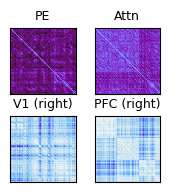

In [48]:
import matplotlib.pyplot as plt
from scipy.stats import zscore
import cmasher as cmr
def norm_mat(mat):
    values = mat[np.triu_indices(mat.shape[0], k=1)]
    norm_values = normalized = (values - values.min()) / (values.max() - values.min())
    #norm_values = zscore(values)
    plot_mat = np.zeros((mat.shape))
    plot_mat[np.triu_indices(mat.shape[0], k=1)] = norm_values
    plot_mat = plot_mat+plot_mat.T
    return plot_mat


plt.rcParams['svg.fonttype'] = 'none'

# Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(2, 2))
cmap = cmr.voltage_r

# PE
axes[0, 0].imshow(norm_mat(pe_avg_rdm), cmap=cmap, vmin=0, vmax=1)
axes[0, 0].set_title("PE", fontsize=9)
axes[0, 0].set_xticklabels([])
axes[0, 0].set_yticklabels([])
axes[0, 0].set_xticks([])
axes[0, 0].set_yticks([])

# Attention
axes[0, 1].imshow(norm_mat(attn_avg_rdm), cmap=cmap, vmin=0, vmax=1)
axes[0, 1].set_title("Attn", fontsize=9)
axes[0, 1].set_xticklabels([])
axes[0, 1].set_yticklabels([])
axes[0, 1].set_xticks([])
axes[0, 1].set_yticks([])

# empirical data R V1
roi = "R_V1_ROI"
print(roi)
rdm_file = f"{data_dir}fMRI/rdms/group_atlas-{atlas}/"
rdm_file += f"method_{fmethod}_roi-{roi}.h5"
data = rsatoolbox.rdm.load_rdm(rdm_file).get_matrices()[0, :, :]
axes[1, 0].imshow(norm_mat(data), cmap=cmap, vmin=0, vmax=1)
axes[1, 0].set_title("V1 (right)", fontsize=9)
axes[1, 0].set_xticklabels([])
axes[1, 0].set_yticklabels([])
axes[1, 0].set_xticks([])
axes[1, 0].set_yticks([])

# empirical data R_a47r_ROI
roi = "R_a47r_ROI"
print(roi)
rdm_file = f"{data_dir}fMRI/rdms/group_atlas-{atlas}/"
rdm_file += f"method_{fmethod}_roi-{roi}.h5"
data = rsatoolbox.rdm.load_rdm(rdm_file).get_matrices()[0, :, :]
axes[1, 1].imshow(norm_mat(data), cmap=cmap, vmin=0, vmax=1)
axes[1, 1].set_title("PFC (right)", fontsize=9)
axes[1, 1].set_xticklabels([])
axes[1, 1].set_yticklabels([])
axes[1, 1].set_xticks([])
axes[1, 1].set_yticks([])
plt.subplots_adjust(hspace=0.35)
plt.savefig("../figures/RDM_examples.svg")
plt.show()

R_a47r_ROI


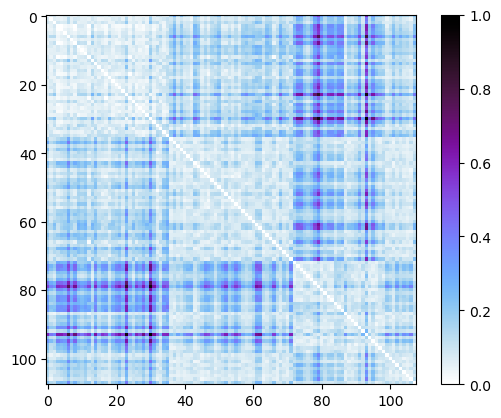

In [49]:
# empirical data R_a47r_ROI
roi = "R_a47r_ROI"
print(roi)
rdm_file = f"{data_dir}fMRI/rdms/group_atlas-{atlas}/"
rdm_file += f"method_{fmethod}_roi-{roi}.h5"
data = rsatoolbox.rdm.load_rdm(rdm_file).get_matrices()[0, :, :]
plt.imshow(norm_mat(data), cmap=cmap, vmin=0, vmax=1)
plt.colorbar()
plt.savefig("../figures/RDM_examples_cb.svg")
plt.show()

## Brain plots

In [50]:
import nibabel as nb
import seaborn as sns
import hcp_utils as hcp
import nilearn.plotting as plotting
import matplotlib.pyplot as plt
import numpy as np
import cmasher as cmr

def pub_surf_plot(input_array, parcellation, save=None, size=(2.2, 2.2), thresh=None, vmin=None, vmax=None, cmap="viridis"):
    if vmax is None:
        vmax = np.nanmax(input_array)
    if vmin is None:
        vmin = np.nanmin(input_array)
    parc = np.squeeze(nb.load(parcellation).get_fdata())
    output = np.zeros((parc.shape))
    borders = np.zeros((parc.shape))
    parcels = np.unique(parc)
    parcels = np.delete(parcels, 0)  # assume 0 denotes no roi

    for i in parcels:
        index = (parc == i)
        output[index] = input_array[int(i)-1]
        borders[index] = i

    fig, axs = plt.subplot_mosaic("""
                              AB
                              CD
                              """,
                                  figsize=size, subplot_kw=dict(
                                      projection='3d'),
                                  constrained_layout=True)
    count = 0
    ax_list = ["A", "B", "C", "D"]
    darkness = 1.0
    alpha = 1.0
    for view in ['lateral', 'medial']:
        for hemi in ['left', 'right']:

            if hemi == 'left':
                surface = hcp.left_cortex_data(output)

                mesh = hcp.mesh.inflated_left
                bg_map = hcp.mesh.sulc_left

            elif hemi == 'right':
                surface = hcp.right_cortex_data(output)

                mesh = hcp.mesh.inflated_right
                bg_map = hcp.mesh.sulc_right

            if save is not None:
                plt.close("all")
                plotting.plot_surf_stat_map(mesh, surface, bg_map=bg_map, view=view, cmap=cmap, threshold=thresh,
                                            hemi=hemi, bg_on_data=True, darkness=darkness,
                                            alpha=alpha, vmax=vmax, vmin=vmin, colorbar=False, symmetric_cbar=False)
                plt.savefig(save+'_'+hemi+'_'+view+'.jpeg', dpi=600)
                plt.close("all")
                plotting.plot_surf_stat_map(mesh, surface, bg_map=bg_map, view=view, cmap=cmap, threshold=thresh,
                                            hemi=hemi, bg_on_data=True, darkness=darkness,
                                            alpha=alpha, vmax=vmax, vmin=vmin, colorbar=True, symmetric_cbar=False)
                plt.savefig(save+'_'+hemi+'_'+view+'_colorbar.jpeg', dpi=600)
                plt.close("all")

            else:

                ax = axs[ax_list[count]]

                plotting.plot_surf_stat_map(mesh, surface, bg_map=bg_map, view=view, cmap=cmap, threshold=thresh,
                                            hemi=hemi, bg_on_data=True, darkness=darkness, axes=ax,
                                            alpha=alpha, vmax=vmax, vmin=vmin, colorbar=False, symmetric_cbar=False)

            count = count+1

    plt.show()


def pub_surf_plot_contours(input_array, input_array2, parcellation, save=None, size=(2.2, 2.2), thresh=None, vmin=None, vmax=None, cmap="viridis"):
    if vmax is None:
        vmax = np.nanmax(input_array)
    if vmin is None:
        vmin = np.nanmin(input_array)
    parc = np.squeeze(nb.load(parcellation).get_fdata())
    output = np.zeros((parc.shape))
    output2 = np.zeros((parc.shape))
    #borders = np.zeros((parc.shape))
    parcels = np.unique(parc)
    parcels = np.delete(parcels, 0)  # assume 0 denotes no roi

    for i in parcels:
        index = (parc == i)
        output[index] = input_array[int(i)-1]
        output2[index] = input_array2[int(i)-1]
        #borders[index] = i

    fig, axs = plt.subplot_mosaic("""
                              AB
                              CD
                              """,
                                  figsize=size, subplot_kw=dict(
                                      projection='3d'),
                                  constrained_layout=True)
    count = 0
    ax_list = ["A", "B", "C", "D"]
    darkness = 1.0
    alpha = 1.0
    for view in ['lateral', 'medial']:
        for hemi in ['left', 'right']:

            if hemi == 'left':
                surface = hcp.left_cortex_data(output)
                surface2 = hcp.left_cortex_data(output2)
                mesh = hcp.mesh.inflated_left
                bg_map = hcp.mesh.sulc_left

            elif hemi == 'right':
                surface = hcp.right_cortex_data(output)
                surface2 = hcp.right_cortex_data(output2)
                mesh = hcp.mesh.inflated_right
                bg_map = hcp.mesh.sulc_right

            if save is not None:
                plt.close("all")
                plotting.plot_surf_stat_map(mesh, surface, bg_map=bg_map, view=view, cmap=cmap, threshold=thresh,
                                            hemi=hemi, bg_on_data=True, darkness=darkness,
                                            alpha=alpha, vmax=vmax, vmin=vmin, colorbar=False, symmetric_cbar=False)
                ax = plt.gca()
                for roi in np.unique(surface2)[1::]:
                    try:
                        plotting.plot_surf_contours(mesh, surface2, levels=[int(roi)], bg_map=bg_map, view=view, colors='k', hemi=hemi, bg_on_data=True, darkness=0.50, axes=ax)
                    except:
                        print("contour not plotting", hemi, view)
                plt.savefig(save+'_'+hemi+'_'+view+'.jpeg', dpi=600)
                plt.close("all")
                plotting.plot_surf_stat_map(mesh, surface, bg_map=bg_map, view=view, cmap=cmap, threshold=thresh,
                                            hemi=hemi, bg_on_data=True, darkness=darkness,
                                            alpha=alpha, vmax=vmax, vmin=vmin, colorbar=True, symmetric_cbar=False)
                plt.savefig(save+'_'+hemi+'_'+view+'_colorbar.jpeg', dpi=600)
                plt.close("all")

            else:
                ax = axs[ax_list[count]]

                plotting.plot_surf_stat_map(mesh, surface, bg_map=bg_map, view=view, cmap=cmap, threshold=thresh,
                                            hemi=hemi, bg_on_data=True, darkness=darkness, axes=ax,
                                            alpha=alpha, vmax=vmax, vmin=vmin, colorbar=False, symmetric_cbar=False)
                
                for roi in np.unique(surface2)[1::]:
                    try:
                        plotting.plot_surf_contours(mesh, surface2, levels=[int(roi)], bg_map=bg_map, view=view, colors='k', hemi=hemi, bg_on_data=True, darkness=0.50, axes=ax)
                    except:
                        print("contour not plotting", hemi, view)

            count = count+1

    plt.show()

def get_cropped_img(img,
                    x_start_buffer=10,
                    x_finish_buffer=10,
                    y_start_buffer=10,
                    y_finish_buffer=10,
                    ):
    # Returns a cropped input image

    # average across color information (3rd dimension)
    m_img = np.mean(img, axis=2)

    x_start = (np.where(np.argmax(m_img != np.max(img), axis=0))
               [0][0]) - x_start_buffer
    x_finish = (np.where(np.argmax(m_img != np.max(img), axis=0))
                [0][-1]) + x_finish_buffer
    y_start = np.where(np.argmax(m_img != np.max(img), axis=1))[
        0][0] - y_start_buffer
    y_finish = np.where(np.argmax(m_img != np.max(img), axis=1))[
        0][-1] + y_finish_buffer

    # Crop the input image based on determined crop heights and widths
    img_cropped = img[y_start:y_finish, x_start:x_finish, :]
    return img_cropped


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


### This generates the figures, which are loaded later in a nicely formatted grid.

In [51]:
def myround(x, base=0.05):
    return np.round(base * round(x/base), 2)

save = True
plot = False
cmap1 = cmr.sunburst
cmap2 = cmr.prinsenvlag_r
stats = ["stat"]#, "percentile"]
model = "pe_layer"
pe ="2dpe"
#lims = [(-.35, 0.35), (0, 1)]
plot_data = np.zeros((4, parc.n_parcels))

for model in ["pe_layer", "mlp_layer", "attn_out_layer"]:
    for layer in [0, 1, 2, 3]:
        for stat in stats:
            # suggested max val - changes across layers...
            #dmax = abs(max(df.loc[(df.pe == pe) & (df.model == model+"_"+str(layer)), stat].values)).round(2)

            # OR don't change across layers:
            dmax = abs(max(df.loc[(df.pe == pe) & (df.model.str.startswith(model)), stat].values)).round(2)
            d_max_round = myround(dmax)
            print(d_max_round)
            plot_data = df.loc[(df.pe == pe) & (df.model == model+str(layer)), stat].values
            plot_data2 = df.loc[(df.pe == pe) & (df.model == model+str(layer)), "p_FDR"].values
            c = 1
            for i in range(len(plot_data2)):
                if plot_data2[i] < 0.05:
                    plot_data2[i] = c
                    c = c+1
                else:
                    plot_data2[i] = 0
            if (cmethod == "corr") & (stat == "stat"):
                cmap = cmap2
            else:
                cmap = cmap1

            if (cmethod == "corr") & (stat == "stat"):
                vmin = d_max_round * -1
                vmax = d_max_round
            elif (cmethod == "cosine") & (stat == "stat"):
                vmin=None
                vmax=None
            else:
                vmin = 0
                vmax = 1
            vmin = -0.25
            vmax = 0.25
            if save:
                # pub_surf_plot(plot_data, parc.file, save=f"../figures/brain_plots/RSA-model-{model}_pe-{pe}_layer-{layer}_stat-{stat}", 
                #             size=(2.5, 2.2), thresh=0.000001, cmap=cmap, vmin=vmin, vmax=vmax)
                pub_surf_plot_contours(plot_data, plot_data2, parc.file, save=f"../figures/brain_plots/RSA-model-{model}{layer}_pe-{pe}_stat-{stat}_contoured", 
                            size=(2.5, 2.2), thresh=0.000001, cmap=cmap, vmin=vmin, vmax=vmax)
            if plot:
                print(model, stat)
                #pub_surf_plot(np.array(plot_data), parc.file, save=None, size=(2.5, 2.2), thresh=0.000001, cmap=cmap, vmin=vmin, vmax=vmax)
                pub_surf_plot_contours(np.array(plot_data), np.array(plot_data2), parc.file, save=None, size=(2.5, 2.2), thresh=0.000001, cmap=cmap, vmin=vmin, vmax=vmax)

0.3
0.3
0.3
0.3
0.35
0.35
0.35
0.35
0.3
0.3
0.3
0.3


# Four panel figure: layers in Attn and PE

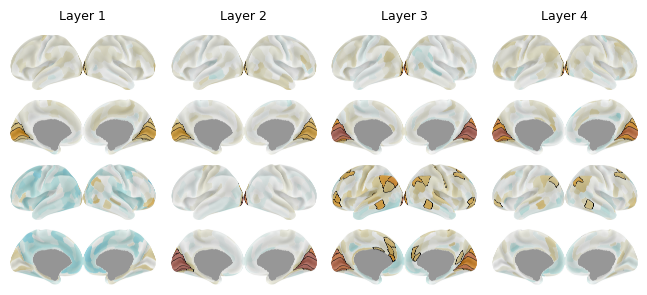

In [52]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.rcParams['svg.fonttype'] = 'none'

# analysis params
stat = "stat"
pe ="2dpe"

# gridspec inside gridspec
fig = plt.figure(figsize=(8.1, 3.4))

# rows
rows = gridspec.GridSpec(3, 1, figure=fig, hspace=0, wspace=0, height_ratios=[0.01, 0.495, 0.495])

# create gridspec between brains and scatter plot
cols = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=rows[0], hspace=0, wspace=0.1)
for layer in range(4):
    ax = fig.add_subplot(cols[layer])
    ax.set_title("Layer "+str(layer+1), fontsize=9)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    sns.despine(left=True, bottom=True, ax=ax)

# MLP brains
model = "pe_layer"
cols = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=rows[1], hspace=0, wspace=0.1)

count = 0
for layer in range(0, 4):
    brain_grid = gridspec.GridSpecFromSubplotSpec(2, 2,
                                                  subplot_spec=cols[count],
                                                  hspace=0, wspace=0)
    b_count = 0
    for view in ['lateral', 'medial']:
        for hemi in ['left', 'right']:

            # get image
            img = plt.imread(
                f"../figures/brain_plots/RSA-model-{model}{layer}_pe-{pe}_stat-{stat}_contoured_{hemi}_{view}.jpeg")
            img_cropped = get_cropped_img(img,
                                          x_start_buffer=0,
                                          x_finish_buffer=0,
                                          y_start_buffer=0,
                                          y_finish_buffer=0)

            # get ax
            ax = fig.add_subplot(brain_grid[b_count])
            ax.set_xticklabels([])
            ax.set_yticklabels([])
            ax.set_xticks([])
            ax.set_yticks([])
            ax.imshow(img_cropped, aspect='equal', rasterized=True)
            sns.despine(left=True, bottom=True, ax=ax)
            b_count = b_count+1
    count = count+1

# Attn brains
model = "attn_out_layer"
cols = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=rows[2], hspace=0, wspace=0.1)

count = 0
for layer in range(0, 4):
    brain_grid = gridspec.GridSpecFromSubplotSpec(2, 2,
                                                  subplot_spec=cols[count],
                                                  hspace=0, wspace=0)
    b_count = 0
    for view in ['lateral', 'medial']:
        for hemi in ['left', 'right']:

            # get image
            img = plt.imread(
                f"../figures/brain_plots/RSA-model-{model}{layer}_pe-{pe}_stat-{stat}_contoured_{hemi}_{view}.jpeg")
            img_cropped = get_cropped_img(img,
                                          x_start_buffer=0,
                                          x_finish_buffer=0,
                                          y_start_buffer=0,
                                          y_finish_buffer=0)

            # get ax
            ax = fig.add_subplot(brain_grid[b_count])
            ax.set_xticklabels([])
            ax.set_yticklabels([])
            ax.set_xticks([])
            ax.set_yticks([])
            ax.imshow(img_cropped, aspect='equal', rasterized=True)
            sns.despine(left=True, bottom=True, ax=ax)
            b_count = b_count+1
    count = count+1
plt.savefig("../figures/RSA_brains_by_layer.svg", dpi=1200)
plt.show()

# Two panel: Average PE and ATTN

In [53]:
def myround(x, base=0.05):
    return np.round(base * round(x/base), 2)

save = True
plot = False
cmap1 = cmr.sunburst
cmap2 = cmr.prinsenvlag_r
stats = ["stat"]#, "percentile"]
pe ="2dpe"
#lims = [(-.35, 0.35), (0, 1)]
plot_data = np.zeros((4, parc.n_parcels))

for model in ["pe_avg", "mlp_avg", "attn_out_avg"]:
    for stat in stats:
        # suggested max val - changes across layers...
        #dmax = abs(max(df.loc[(df.pe == pe) & (df.model == model+"_"+str(layer)), stat].values)).round(2)

        # OR don't change across layers:
        dmax = abs(max(df.loc[(df.pe == pe) & (df.model == model), stat].values)).round(3)
        d_max_round = myround(dmax)
        print(dmax, d_max_round)
        plot_data = df.loc[(df.pe == pe) & (df.model == model), stat].values
        plot_data2 = df.loc[(df.pe == pe) & (df.model == model), "p_FDR"].values
        c = 1
        for i in range(len(plot_data2)):
            if plot_data2[i] < 0.05:
                plot_data2[i] = c
                c = c+1
            else:
                plot_data2[i] = 0
        if (cmethod == "corr") & (stat == "stat"):
            cmap = cmap2
        else:
            cmap = cmap1

        if (cmethod == "corr") & (stat == "stat"):
            vmin = d_max_round * -1
            vmax = d_max_round
        elif (cmethod == "cosine") & (stat == "stat"):
            vmin=None
            vmax=None
        else:
            vmin = 0
            vmax = 1

        # actually, set some absolute limits for comparison
        vmax = 0.25
        vmin = -0.25
        
        if save:
            # pub_surf_plot(plot_data, parc.file, save=f"../figures/brain_plots/RSA-model-{model}_pe-{pe}_layer-{layer}_stat-{stat}", 
            #             size=(2.5, 2.2), thresh=0.000001, cmap=cmap, vmin=vmin, vmax=vmax)
            pub_surf_plot_contours(plot_data, plot_data2, parc.file, save=f"../figures/brain_plots/RSA-model-{model}_pe-{pe}_stat-{stat}_contoured", 
                        size=(2.5, 2.2), thresh=0.000001, cmap=cmap, vmin=vmin, vmax=vmax)
        if plot:
            print(model, stat)
            #pub_surf_plot(np.array(plot_data), parc.file, save=None, size=(2.5, 2.2), thresh=0.000001, cmap=cmap, vmin=vmin, vmax=vmax)
            pub_surf_plot_contours(np.array(plot_data), np.array(plot_data2), parc.file, save=None, size=(2.5, 2.2), thresh=0.000001, cmap=cmap, vmin=vmin, vmax=vmax)

0.276 0.3
0.172 0.15
0.151 0.15


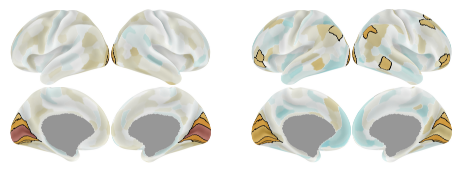

In [54]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.rcParams['svg.fonttype'] = 'none'

# analysis params
stat = "stat"
pe ="2dpe"

# gridspec inside gridspec
fig = plt.figure(figsize=(5.7, 2.0))

# create gridspec for cols
main_cols = gridspec.GridSpec(1, 2, figure=fig, width_ratios=[0.5, 0.5], wspace=0.2)

for i, model in enumerate(["pe_avg", "attn_out_avg"]):
    brain_grid = gridspec.GridSpecFromSubplotSpec(2, 2,
                                                    subplot_spec=main_cols[i],
                                                    hspace=0.01, wspace=0.01)
    b_count = 0
    for view in ['lateral', 'medial']:
        for hemi in ['left', 'right']:

            # get image
            img = plt.imread(f"../figures/brain_plots/RSA-model-{model}_pe-{pe}_stat-{stat}_contoured_{hemi}_{view}.jpeg")
            img_cropped = get_cropped_img(img,
                                            x_start_buffer=0,
                                            x_finish_buffer=0,
                                            y_start_buffer=0,
                                            y_finish_buffer=0)

            # get ax
            ax = fig.add_subplot(brain_grid[b_count])
            ax.set_xticklabels([])
            ax.set_yticklabels([])
            ax.set_xticks([])
            ax.set_yticks([])
            ax.imshow(img_cropped, aspect='equal', rasterized=True)
            sns.despine(left=True, bottom=True, ax=ax)
            b_count = b_count+1

plt.savefig("../figures/RSA_brains_2panel_averages.svg", dpi=1200)
plt.show()